# Step 1: import libraries

<p style="text-align: justify "> 
.....
</p>

In [24]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, fbeta_score, f1_score, roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import  SVC


# Step 2: Load Dataset

In [25]:

data = pd.read_csv("Dataset/train_100r.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,...,26.770957,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792
1,1,0,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,...,13.444048,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751
2,2,0,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,...,16.217174,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198
3,3,0,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,...,30.842052,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056
4,4,1,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,...,31.950207,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414


In [26]:
diagnosis = data['diagnosis']
data.drop( labels= ['id', 'diagnosis' ], axis= 1, inplace= True )
data['diagnosis'] = diagnosis
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,0.210508,0.055248,...,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792,1
1,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,0.226011,0.055626,...,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751,0
2,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,0.186815,0.051772,...,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198,0
3,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,0.221436,0.068286,...,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056,0
4,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,0.301315,0.059410,...,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414,1



<p style="text-align: justify "> 
    Dataset provided has various features that describe breast cancer as malignant or benign. Provided are 25524 records and 30 elements that define the output dependent variable.
</p>

We may have a better grasp of each column and the sort of data it contains by reading the sections below:
<ol>   
<li>ID Number:</li> The serial number of each record in the dataset is stored in this integer type field.
<li>Diagnosis:</li> This column contains our tagged data on whether a doctor diagnosed the patient was diagnosed with breast cancer, with "M" representing a malignant cancer cell and "B" representing tumour cells.
<li>Radius:</li> This column of type integer contains information on each patient's cancer cell at the time of therapy. The radius is the average of the distances between the centre and the points on the periphery.
<li>Texture:</li> This integer type column contains information on the texture of each patient's cancer cells at the time of therapy. The standard deviation of grey-scale values is known as texture.
<li>Perimeter:</li> At the time of therapy, this column of type integer holds information on the perimeter of each patient's cancer cell.
<li>Area:</li> This column of type integer contains information on the area of each cancer cell at the time of therapy.
<li>Smoothness:</li> This integer type column offers local variation in radius lengths.
<li>Compactness:</li> This integer type column offers data on the compactness of each cancer cell. The compactness is calculated by using the formula perimeter^2 / area - 1.0.
<li>Concavity:</li> This integer type column contains information about the severity of concave sections of each cancer cell's shape.
<li>Concave points:</li> This integer type column contains information about the number of concave portions of the contour of each cancer cell's shape.
<li>Symmetry:</li> This integer type column contains information about the symmetry of each cancer cell's shape.
<li>Fractal dimension:</li> This integer type column contains information about the coastline approximation of each cancer cell's shape.
<ol>
    


<p style="text-align: justify "> 
For each picture, the mean, standard error, and "worst" or worst (mean of the three most significant values) features were computed, yielding 30 features.
</p>

# Step 3: Exploratory Data Analysis

In [27]:
# Size of data set
data.shape

(25524, 31)

<p style="text-align: justify "> 
    We have 25524 records and 32 features. Out of 32 features we have 31 independent features and the dependent feature is diagnosis
</p>


In [28]:
# information about data set 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25524 entries, 0 to 25523
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              25524 non-null  float64
 1   texture_mean             25524 non-null  float64
 2   perimeter_mean           25524 non-null  float64
 3   area_mean                25524 non-null  float64
 4   smoothness_mean          25524 non-null  float64
 5   compactness_mean         25524 non-null  float64
 6   concavity_mean           25524 non-null  float64
 7   concave points_mean      25524 non-null  float64
 8   symmetry_mean            25524 non-null  float64
 9   fractal_dimension_mean   25524 non-null  float64
 10  radius_se                25524 non-null  float64
 11  texture_se               25524 non-null  float64
 12  perimeter_se             25524 non-null  float64
 13  area_se                  25524 non-null  float64
 14  smoothness_se         

### 3.1 Analyse Null Values

In [29]:
# see the number of null values 
for feature_name in data.columns:
    print(f"{feature_name} -> {data[feature_name].isna().sum()}")

radius_mean -> 0
texture_mean -> 0
perimeter_mean -> 0
area_mean -> 0
smoothness_mean -> 0
compactness_mean -> 0
concavity_mean -> 0
concave points_mean -> 0
symmetry_mean -> 0
fractal_dimension_mean -> 0
radius_se -> 0
texture_se -> 0
perimeter_se -> 0
area_se -> 0
smoothness_se -> 0
compactness_se -> 0
concavity_se -> 0
concave points_se -> 0
symmetry_se -> 0
fractal_dimension_se -> 0
radius_worst -> 0
texture_worst -> 0
perimeter_worst -> 0
area_worst -> 0
smoothness_worst -> 0
compactness_worst -> 0
concavity_worst -> 0
concave points_worst -> 0
symmetry_worst -> 0
fractal_dimension_worst -> 0
diagnosis -> 0


<p style="text-align: justify "> 
    We do not have any missing values, as we see from output of the above code snippet.
</p>

### 3.2 Data Distribution

radius_mean


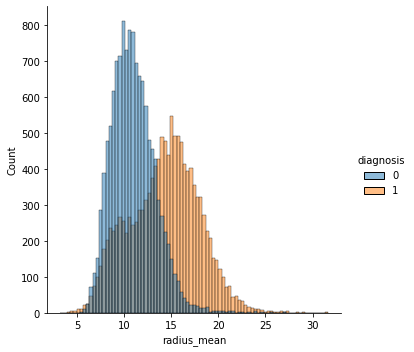

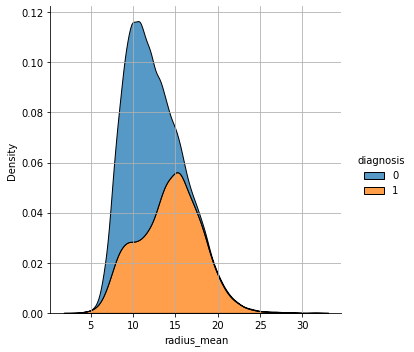

texture_mean


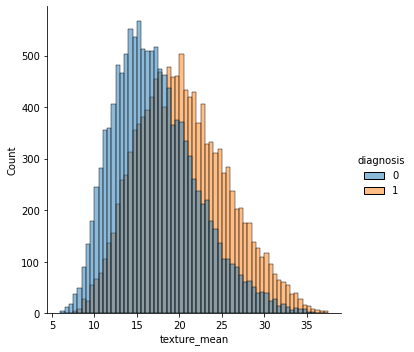

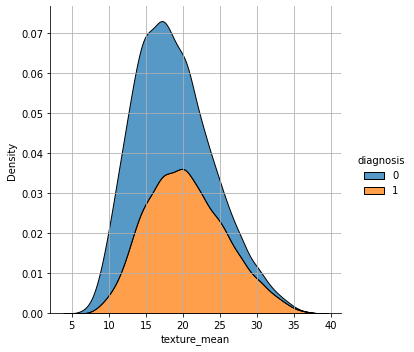

perimeter_mean


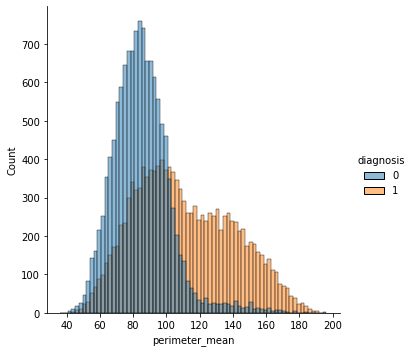

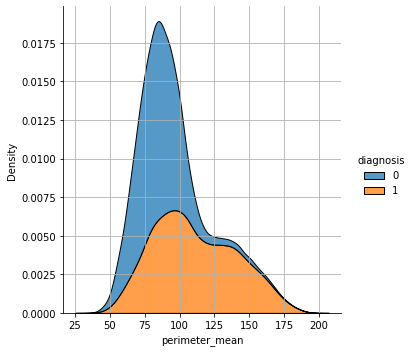

area_mean


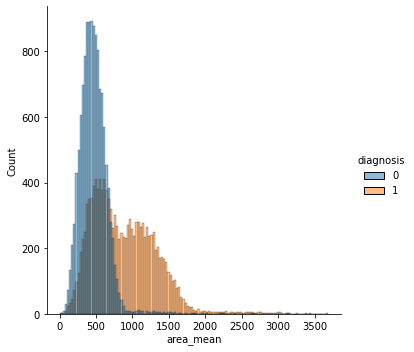

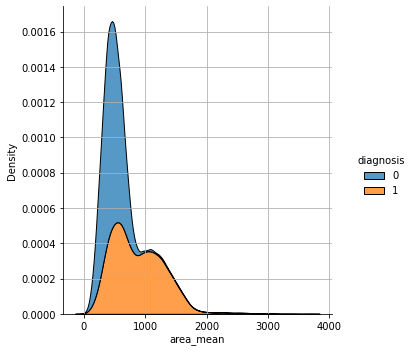

smoothness_mean


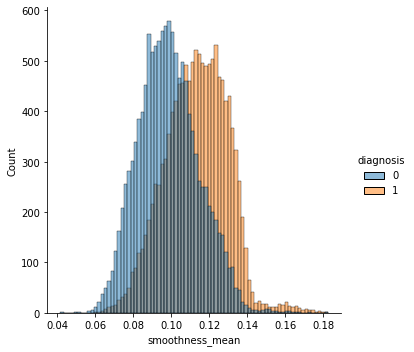

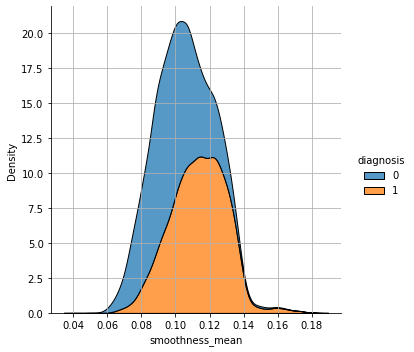

compactness_mean


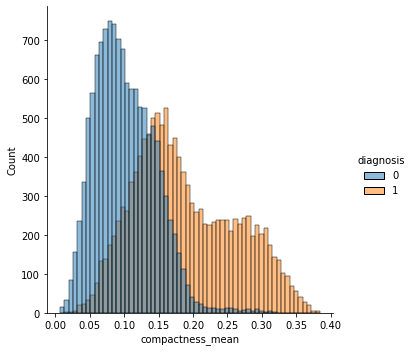

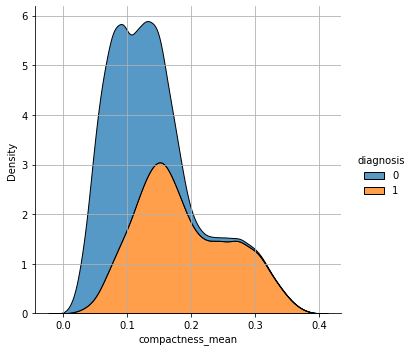

concavity_mean


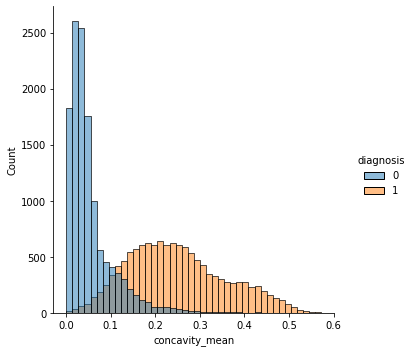

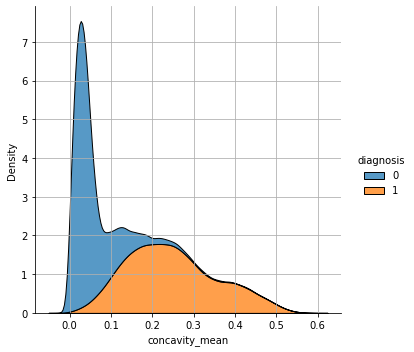

concave points_mean


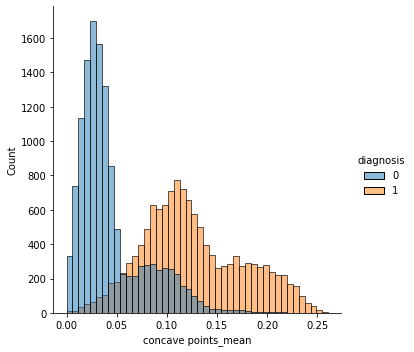

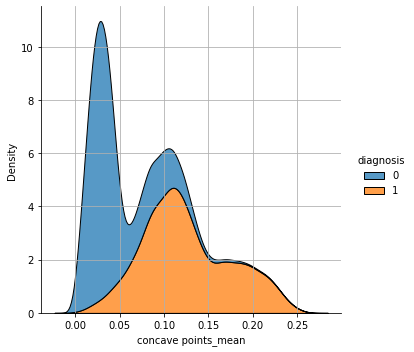

symmetry_mean


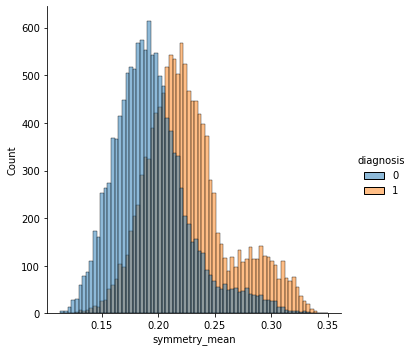

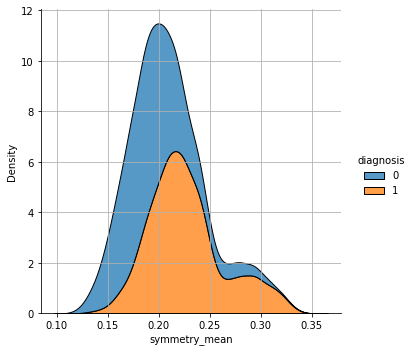

fractal_dimension_mean


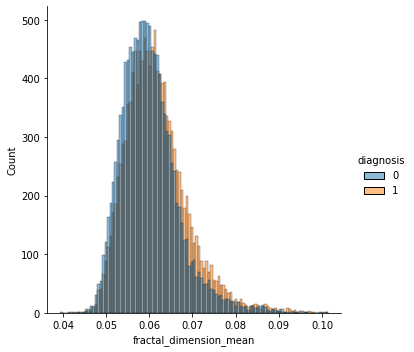

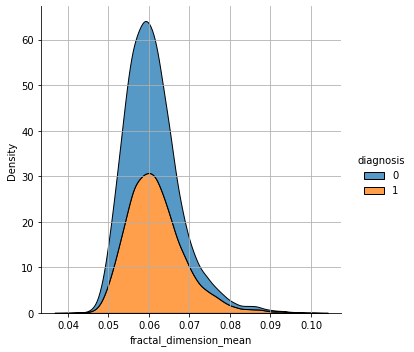

radius_se


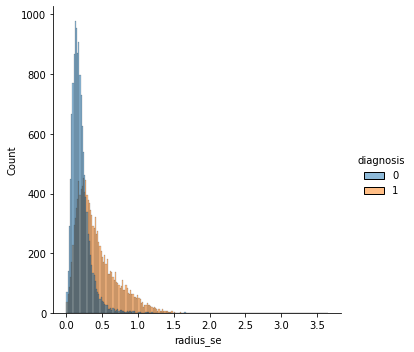

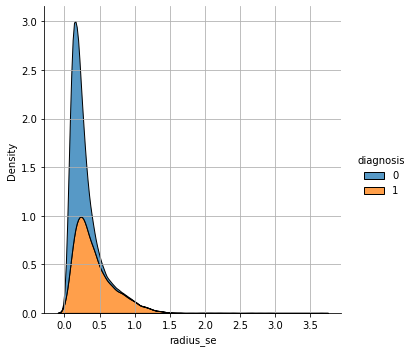

texture_se


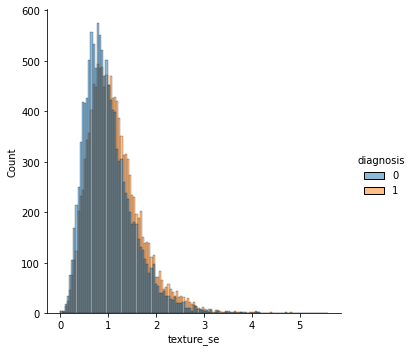

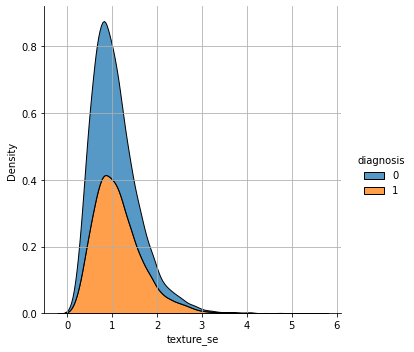

perimeter_se


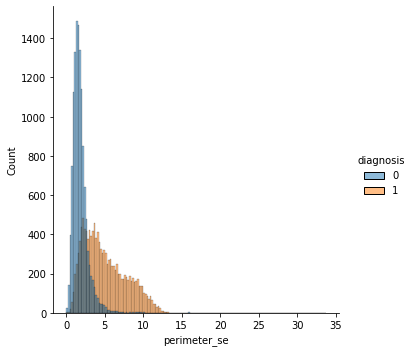

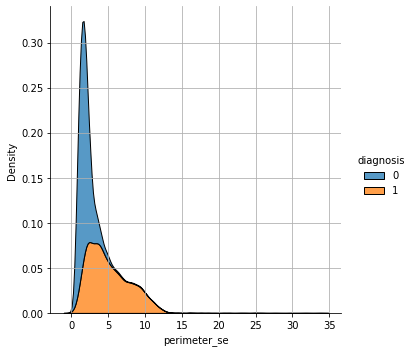

area_se


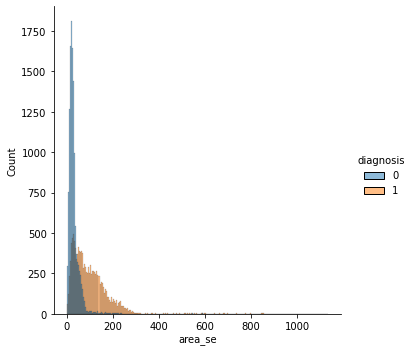

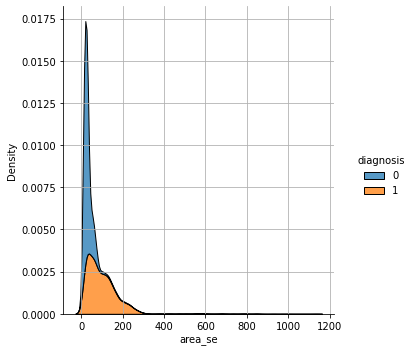

smoothness_se


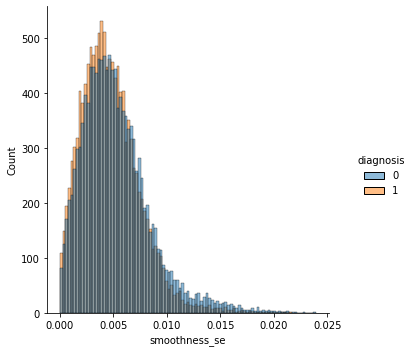

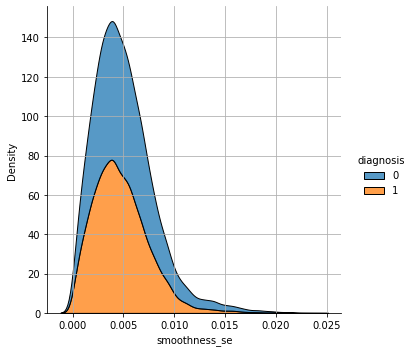

compactness_se


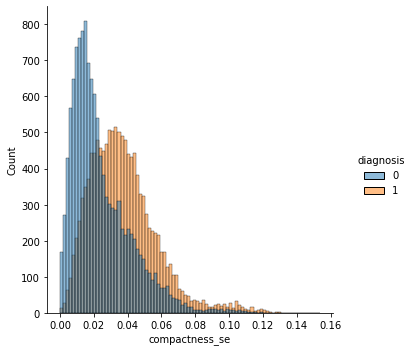

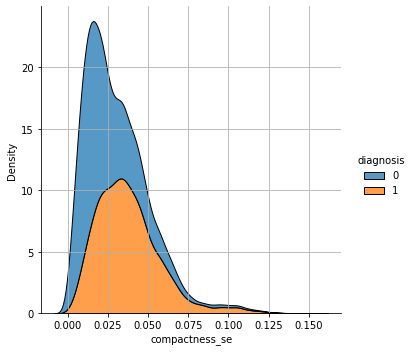

concavity_se


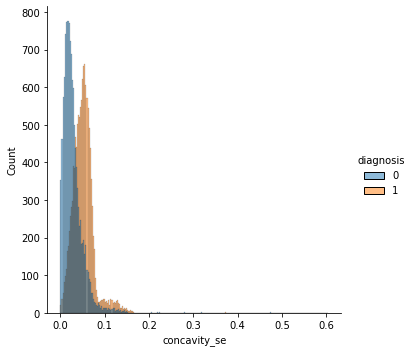

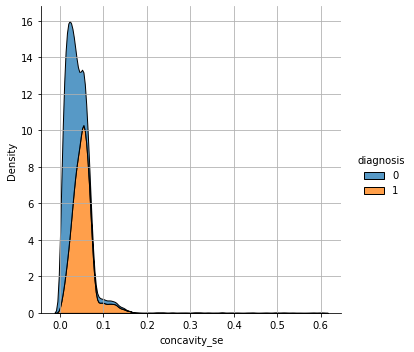

concave points_se


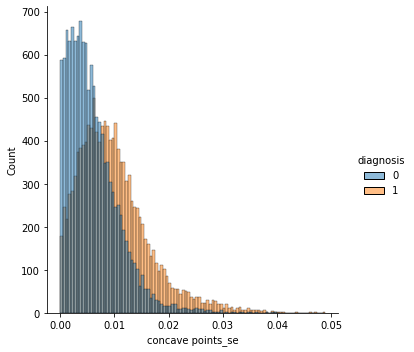

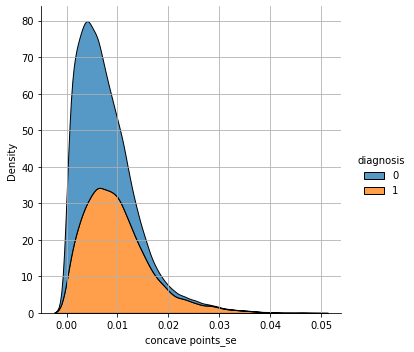

symmetry_se


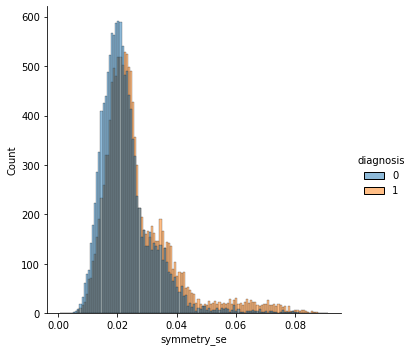

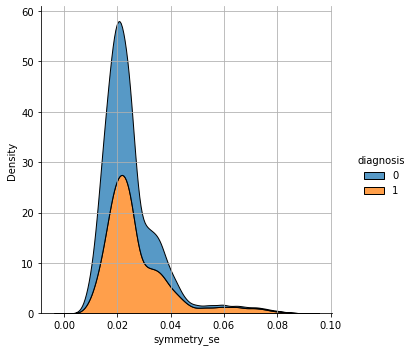

fractal_dimension_se


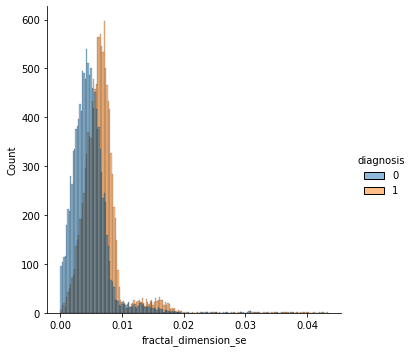

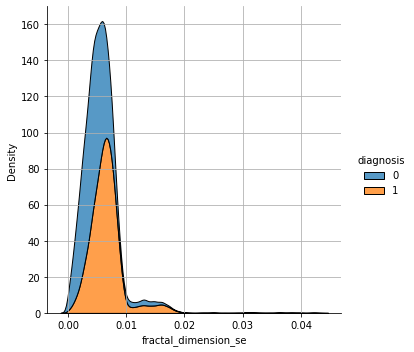

radius_worst


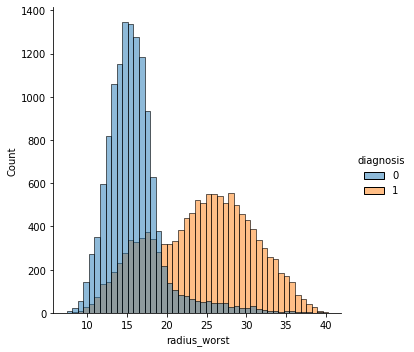

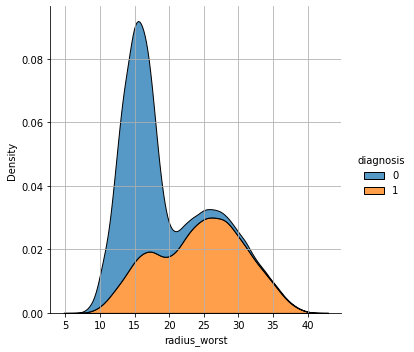

texture_worst


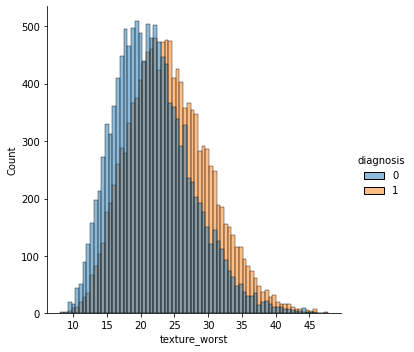

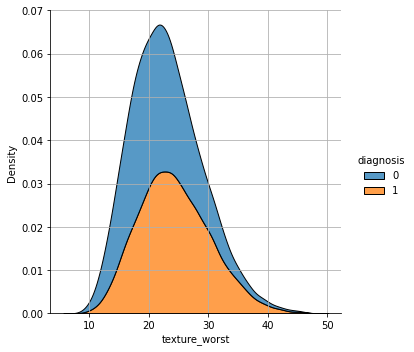

perimeter_worst


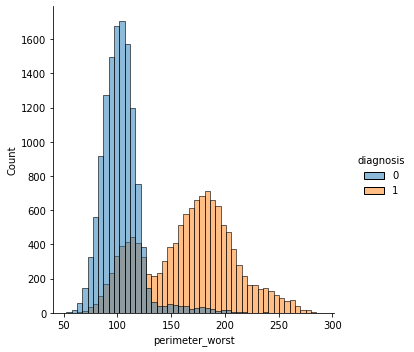

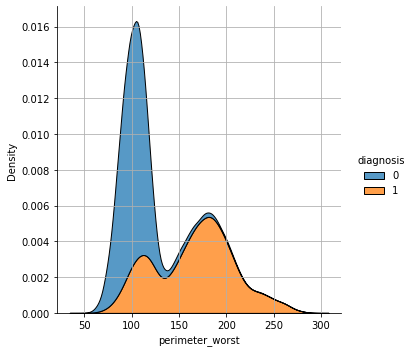

area_worst


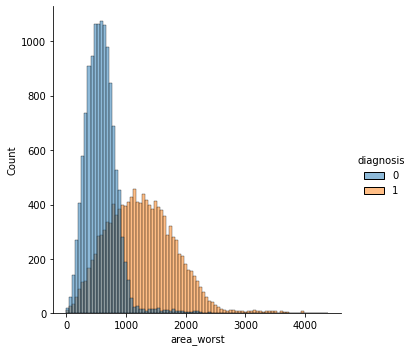

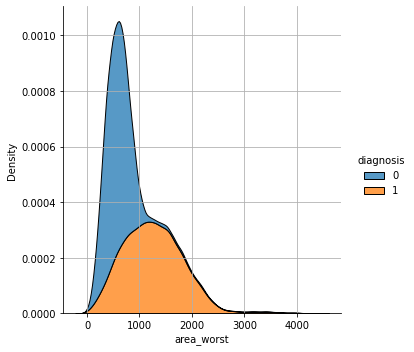

smoothness_worst


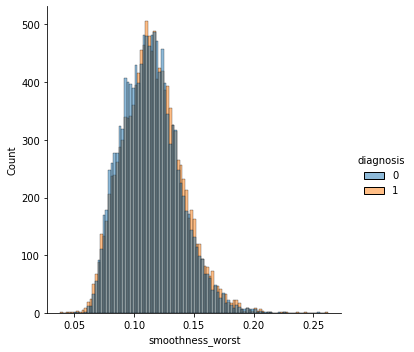

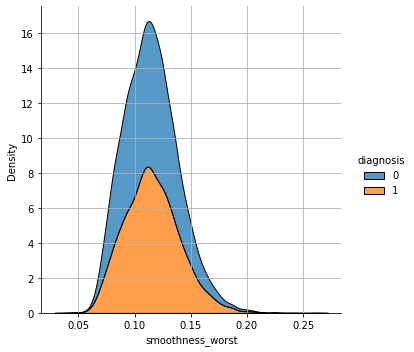

compactness_worst


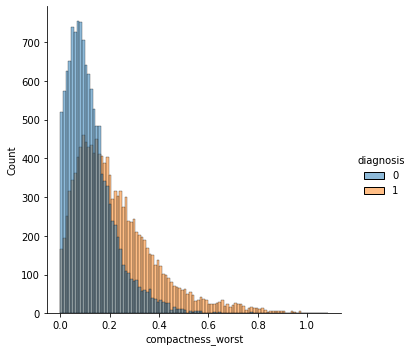

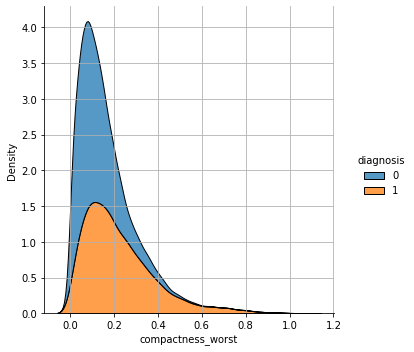

concavity_worst


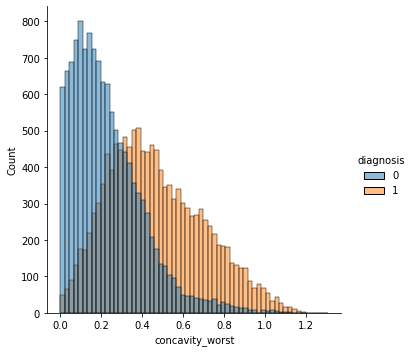

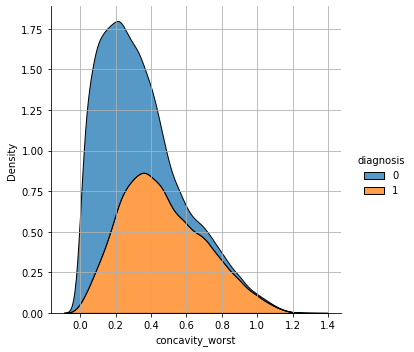

concave points_worst


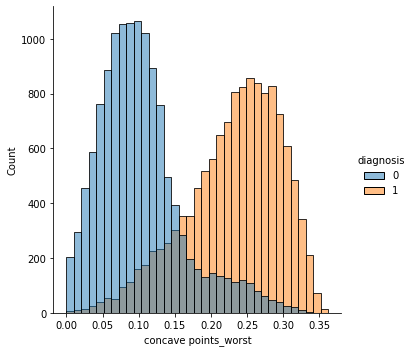

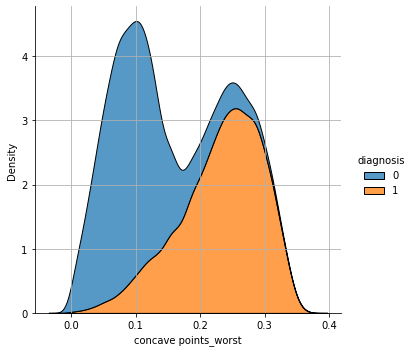

symmetry_worst


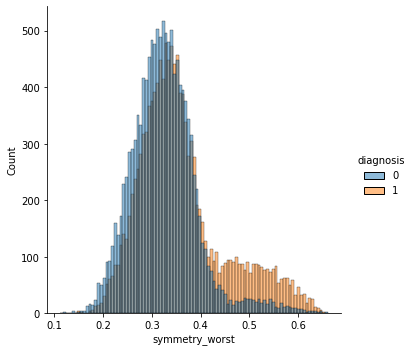

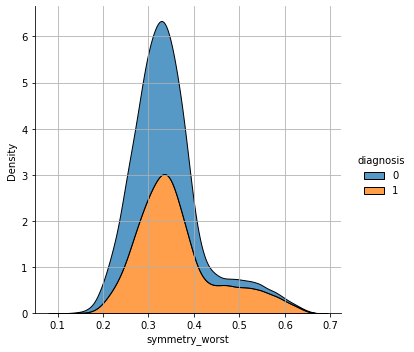

fractal_dimension_worst


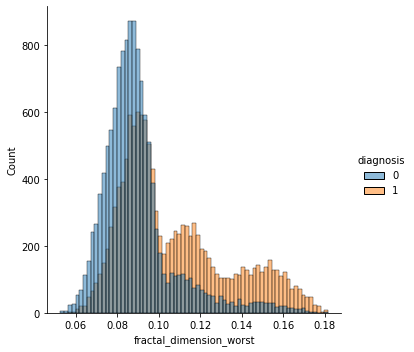

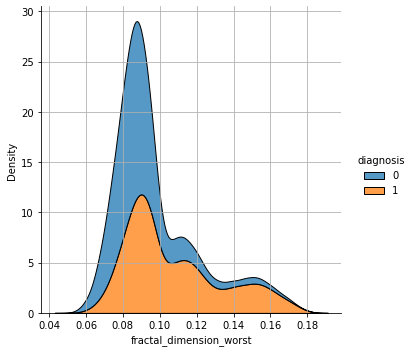

In [30]:
# Data Distribution 
for colm in data.select_dtypes(np.float_).columns:
    
    print(colm) 
    sns.displot(data, x = colm,  hue="diagnosis")
    sns.displot(data, x = colm,  hue="diagnosis", kind="kde", fill=True,  multiple="stack")
    plt.grid()
    plt.show()
    

<p style="text-align: justify "> 
Features like area_mean, concavity_mean, concave points_mean,  radius_se, texture_se, perimeter_se, area_se, concavity_se, concave points_se, fractal_dimension_se, radius_worst, perimeter_worst, area_worst, compactness_worst, concave points_worst, fractal_dimension_worst are not distributed normally! <b>Importance of data distribution Explain</b>
</p>

### 3.3 Data Standardization

In [31]:
# Power Transform of the data 

from scipy.stats import boxcox 

features_to_transform = ["area_mean", "concavity_mean", "concave points_mean", "radius_se", "texture_se",
                         "perimeter_se", "area_se", "concavity_se", "concave points_se", "fractal_dimension_se", "radius_worst", 
                         "perimeter_worst", "area_worst", "compactness_worst", "concave points_worst", "fractal_dimension_worst" ]


for f in features_to_transform:
    
    print(f"{f}")
    print()
    #print("Before Log Transformaton")
    #sns.displot(data, x = f,  hue="diagnosis", kind="kde", fill=True , label = "before transformation")
    #plt.grid()
    #plt.show()
    
    
    data[f] = np.log(data[f].values)
    #print("After Log Transformaton")
    #sns.displot(data, x = f,  hue="diagnosis", kind="kde", fill=True, label = "before transformation")
    #plt.grid()
    #plt.show()

area_mean

concavity_mean

concave points_mean

radius_se

texture_se

perimeter_se

area_se

concavity_se

concave points_se

fractal_dimension_se

radius_worst

perimeter_worst

area_worst

compactness_worst

concave points_worst

fractal_dimension_worst



### 3.4 Handle Outliers

<p style="text-align: justify "> 
    <ol>
        <li>What is an Anomaly/Outlier? </li>
        <li>Why Care about Anomaly? </li>
        <li>Five Ways to detect Anomaly </li> 
            <ol>
                <li> Standard Deviation </li>
                <li> Boxplots </li>
                <li> DBScan Clustering </li>
                <li> Isolation Forest </li>
                <li> Robust Random Cut Forest </li>
            </ol>
    </ol>
</p>
(Badr, 2022)


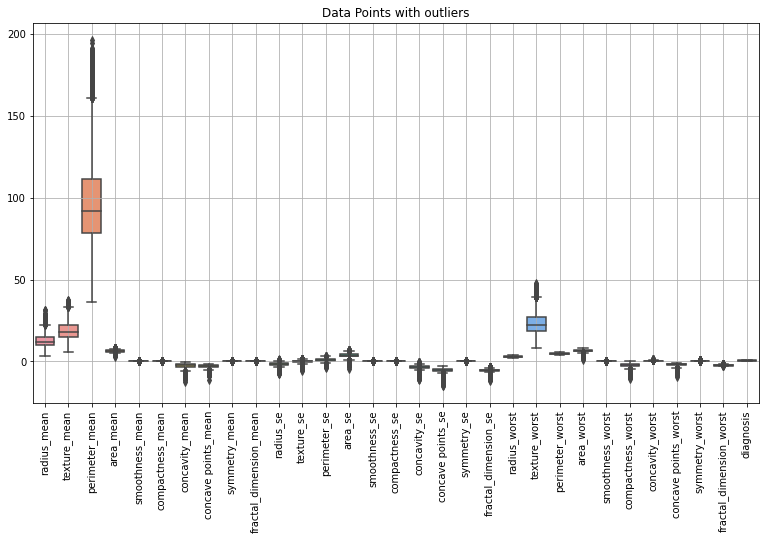

In [32]:
# Outlier Detection 
#Using Boxplot to display outliers present in the dataset

plt.figure(figsize=(13,7))
plt.title("Data Points with outliers")
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

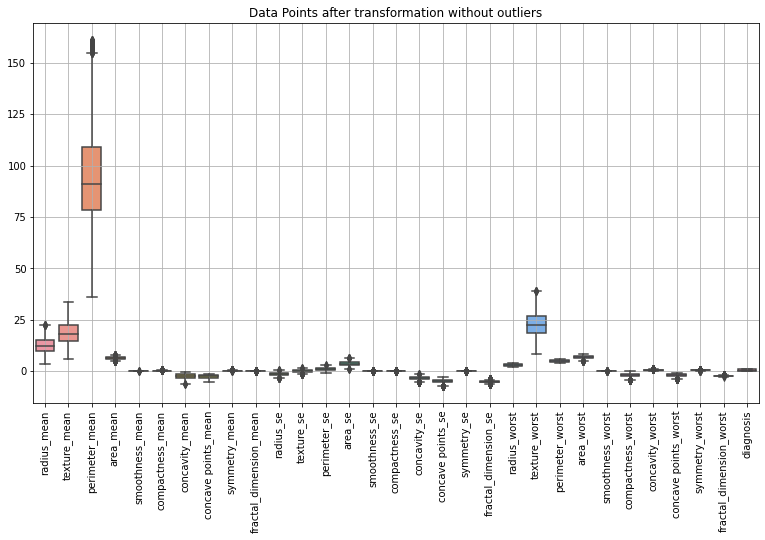

In [33]:
# Find the upper bound and lower bound for every feature 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
lower_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)


data = data[~((data < lower_bound) | (data > upper_bound ) ).any(axis = 1)];

#Using Boxplot to display outliers present in the dataset
plt.figure(figsize=(13,7))
plt.title("Data Points after transformation without outliers")
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

### 3.5 Visualisation of Output Variable

0    7220
1    6687
Name: diagnosis, dtype: int64



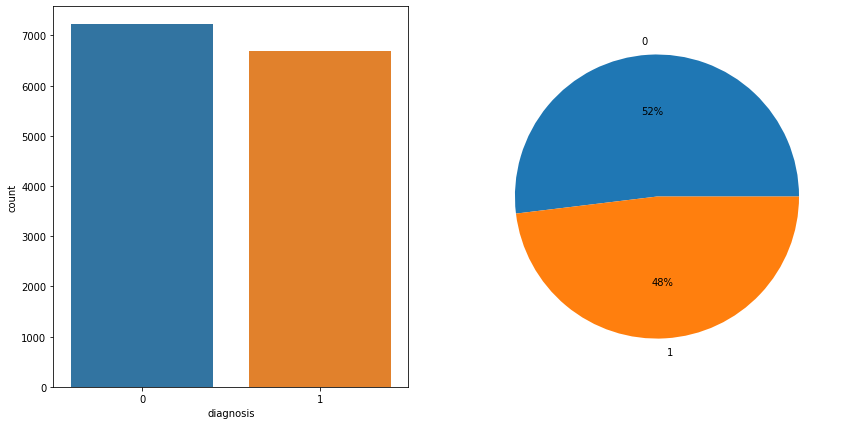

In [34]:
# Class distribution of Output/dependent feature

print( data['diagnosis'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'diagnosis' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['diagnosis'].value_counts() , labels= [0, 1], autopct='%.0f%%')

plt.show()

### 3.6 Balance Output Data  

<p style="text-align: justify "> 
After dealing with outliers, we can see that number of data points for class 0 is slightly more than class 1. To balance the data set, we will generate synthetic data. <b> Generate data Explain </b>
</p>

In [35]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE(sampling_strategy= 1)

In [36]:
X , y = sampler.fit_resample(data.iloc[:,:-1].values , data.iloc[:,-1].values )

In [37]:
df = pd.DataFrame()
for i, fea in enumerate(data.iloc[:, :-1].columns):
    df[fea] = X[:, i]

df['diagnosis'] = y
data = df.copy()
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,10.302042,16.758441,97.568306,5.768424,0.129037,0.090188,-3.139866,-3.973989,0.226011,0.055626,...,25.704716,4.568040,5.390193,0.157770,-2.100805,0.022506,-2.208718,0.279209,-2.580302,0
1,8.045502,16.094636,78.540549,6.398021,0.077613,0.064573,-4.927970,-2.916258,0.186815,0.051772,...,22.345908,4.725165,6.704590,0.110365,-2.366014,0.411800,-2.567198,0.343249,-2.373025,0
2,6.892966,27.320674,155.892797,5.962459,0.116123,0.110978,-2.102740,-3.059030,0.301315,0.059410,...,22.585051,4.498423,7.238961,0.114831,-1.791497,0.198205,-1.713228,0.342547,-2.249856,1
3,9.148873,9.812381,77.633062,5.392252,0.107201,0.091145,-3.970016,-4.577198,0.180661,0.062188,...,14.888842,4.483572,5.929361,0.160798,-3.037499,0.081466,-2.945898,0.391160,-2.515834,0
4,8.765203,14.624680,77.328347,7.047549,0.092928,0.131232,-1.683376,-2.528733,0.186120,0.067075,...,16.555291,4.620966,6.407634,0.102006,-2.053204,0.379895,-1.213340,0.372551,-2.519682,0


0    7220
1    7220
Name: diagnosis, dtype: int64



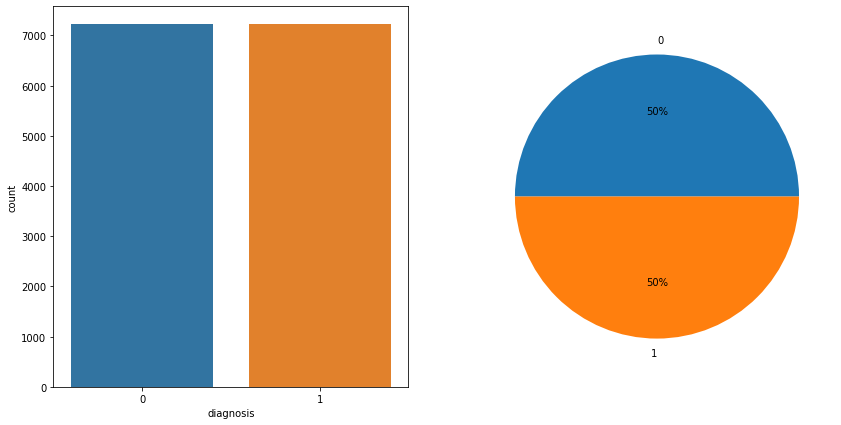

In [38]:
# Class distribution of Output/dependent feature

print( data['diagnosis'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'diagnosis' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['diagnosis'].value_counts() , labels= [0, 1], autopct='%.0f%%')

plt.show()

### 3.7 Corelation Matrix

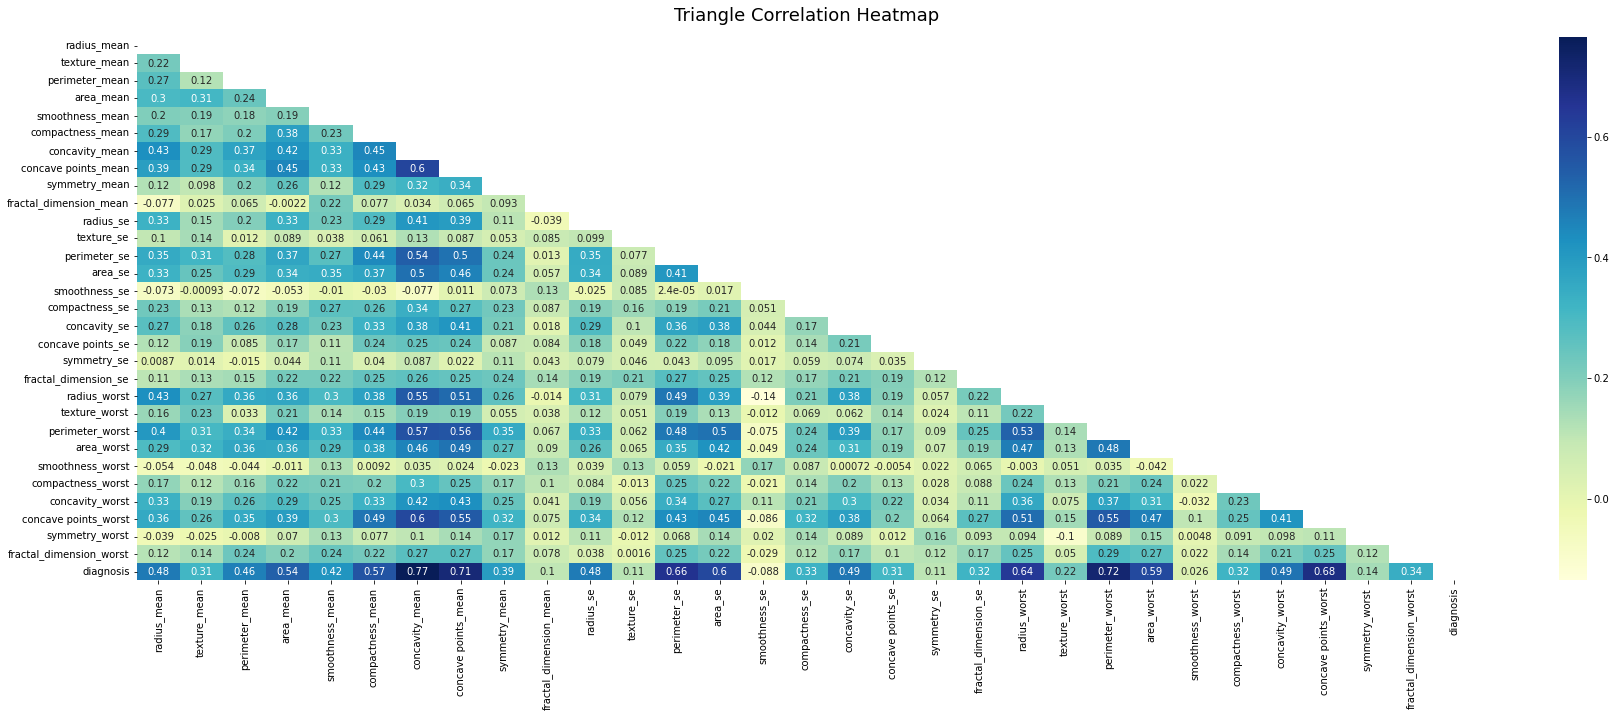

In [39]:
plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### 3.8 Feature Selection

In [40]:
# analiseing the feature importance using randome forest

fe_imp = RandomForestClassifier()
fe_imp.fit(data.iloc[:, :-1].values , data.iloc[:, -1].values)

for i, j in enumerate(fe_imp.feature_importances_):
    print(f"{i} :   {data.columns[i]}  has the { np.around(j , decimals= 5 )*100 } importance")

0 :   radius_mean  has the 2.246 importance
1 :   texture_mean  has the 0.251 importance
2 :   perimeter_mean  has the 1.585 importance
3 :   area_mean  has the 3.46 importance
4 :   smoothness_mean  has the 0.9329999999999999 importance
5 :   compactness_mean  has the 2.5020000000000002 importance
6 :   concavity_mean  has the 16.930999999999997 importance
7 :   concave points_mean  has the 12.870000000000001 importance
8 :   symmetry_mean  has the 0.604 importance
9 :   fractal_dimension_mean  has the 0.27799999999999997 importance
10 :   radius_se  has the 1.587 importance
11 :   texture_se  has the 0.22300000000000003 importance
12 :   perimeter_se  has the 6.212 importance
13 :   area_se  has the 4.074 importance
14 :   smoothness_se  has the 0.295 importance
15 :   compactness_se  has the 0.262 importance
16 :   concavity_se  has the 1.318 importance
17 :   concave points_se  has the 0.45799999999999996 importance
18 :   symmetry_se  has the 0.308 importance
19 :   fractal_dimens

### 3.9 Feature Extraction 

In [9]:
pca = PCA(n_components= 10)

most_valued_data_points = pca.fit_transform(data.iloc[:, :-1].values)


DATA = pd.DataFrame(data = most_valued_data_points , columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

DATA['Target'] = data.iloc[:, -1].values


DATA.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,Target
0,-43.942882,-217.707414,22.892946,16.954002,-3.031412,-6.860382,-13.405145,-7.601555,5.876966,1.913207,1
1,-786.820904,-74.578010,4.128922,4.258633,14.369852,2.700536,4.099053,-0.469362,-0.491493,1.218387,0
2,-131.165325,-27.581313,-54.768906,7.909600,-13.045304,-2.319164,1.437370,-1.656904,-3.087524,-0.518919,0
3,-272.046136,-171.112008,-19.867894,9.930522,-22.048670,11.003198,-10.377786,5.925815,-3.302625,-2.128564,0
4,331.125153,-432.706209,-65.004264,26.316605,62.138079,9.675235,-8.205723,7.527085,-7.669502,4.920435,1


### 3.10 Split data 

In [41]:
if True:
    DATA = data.copy()

X_train, X_test, y_train, y_test = train_test_split( DATA.iloc[:, :-1].values, 
                                                    DATA.iloc[:, -1].values, 
                                                    test_size=0.25)

### 3.11 Split data 

In [42]:
# DATA SCALING 

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Step 4: Model Definition and Analysis

### 4.1 Define helper function 

### 4.3 deep Learning Approaches

In [43]:
import torch
import torch.nn as nn

In [44]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test, dtype=torch.long)

In [45]:
def aNNmodel():
    
    # model architecture
    ANNclassifier = nn.Sequential(
        nn.Linear(torch.tensor(X_train).shape[1] , 16), # Input Layer
        nn.LeakyReLU(),                                      # activation unit
        nn.Linear(16, 32),                              # Dense Layer 1
        nn.BatchNorm1d(32),
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(32, 64),                              # Dense Layer 1
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(64, 128),                              # Dense Layer 1
        nn.LeakyReLU(),                                 # activation unit
        nn.AlphaDropout(),
        nn.Linear(128, 256),                              # Dense Layer 1
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(256,512),                                 # Output Layer
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(512,64),                                 # Output Layer
        nn.BatchNorm1d(64),
        nn.Dropout(),
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(64,32),                                 # Output Layer
        nn.Dropout(),
        nn.BatchNorm1d(32),
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(32,2),                                 # Output Layer
        
    )
    
    # Loss Function
    lossfun = nn.CrossEntropyLoss()
    
    # Optimizer
    optimizer = torch.optim.Adam(ANNclassifier.parameters())
    
    return ANNclassifier, lossfun, optimizer
        


In [46]:
# a function that trains the model


def trainTheModel(ANNmodel):
    
    # a fixed parameter
    numepochs = 150
    ongoingAcc = []
    valAcc = []
    losses = torch.zeros(numepochs)
    
    # loop over epochs
    
    for epochi in range(numepochs):
        # forward pass
        yHat = ANNmodel(X_train)

        # compute loss
        loss = lossfun(yHat,y_train)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # compute accuracy
        
        matches = torch.argmax(yHat,axis=1) == y_train # booleans (false/true)
        
        matchesNumeric = matches.float()              # convert to numbers (0/1)
        
        accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
        
        ongoingAcc.append( accuracyPct )              # add to list of accuracies
        
        
        # compute Val Accuracy
        
        matches_V = torch.argmax(ANNmodel(X_test),axis=1) == y_test # booleans (false/true)
        
        matchesNumeric_V = matches_V.float()              # convert to numbers (0/1)
        
        vaccuracyPct = 100*torch.mean(matchesNumeric_V)  # average and x100 
        
        valAcc.append( vaccuracyPct )              # add to list of accuracies
        
        print(f"epoch {epochi} : Accuracy {accuracyPct} : ValAccuracy {vaccuracyPct}")
    
    # final forward pass
    predictions = ANNmodel(X_train)
    
    # compute the predictions and report accuracy
    
    return losses,predictions,ongoingAcc,valAcc

In [47]:
# create everything
ANNclassify,lossfun,optimizer = aNNmodel()

# run it
losses,predictions, ongoingAcc, valAcc = trainTheModel(ANNclassify)



epoch 0 : Accuracy 50.07386779785156 : ValAccuracy 50.443214416503906
epoch 1 : Accuracy 49.953834533691406 : ValAccuracy 51.1080322265625
epoch 2 : Accuracy 50.53554916381836 : ValAccuracy 50.60941696166992
epoch 3 : Accuracy 50.68328857421875 : ValAccuracy 51.68975067138672
epoch 4 : Accuracy 50.40627670288086 : ValAccuracy 52.022159576416016
epoch 5 : Accuracy 51.18190002441406 : ValAccuracy 52.38227081298828
epoch 6 : Accuracy 52.39150619506836 : ValAccuracy 52.10526657104492
epoch 7 : Accuracy 52.594642639160156 : ValAccuracy 53.878116607666016
epoch 8 : Accuracy 53.08402633666992 : ValAccuracy 54.736839294433594
epoch 9 : Accuracy 53.397972106933594 : ValAccuracy 54.21052551269531
epoch 10 : Accuracy 53.471839904785156 : ValAccuracy 55.12465286254883
epoch 11 : Accuracy 55.549400329589844 : ValAccuracy 56.89751052856445
epoch 12 : Accuracy 56.47275924682617 : ValAccuracy 57.479225158691406
epoch 13 : Accuracy 58.36565017700195 : ValAccuracy 59.58448791503906
epoch 14 : Accuracy 5

Final accuracy: 99.1782%


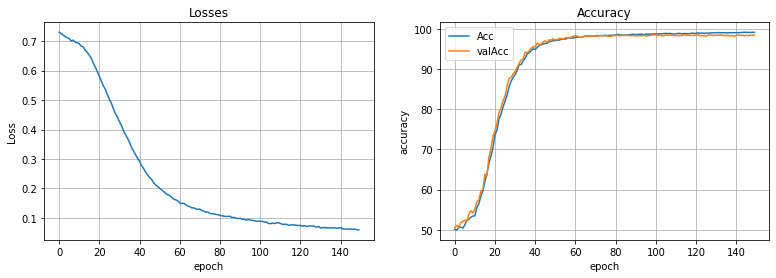

Final validation accuracy: 98.3657%


In [48]:

# report accuracy
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == y_train).float())
print('Final accuracy: %g%%' %totalacc)


fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')
ax[0].grid()

ax[1].plot(ongoingAcc, label = "Acc")
ax[1].plot(valAcc, label = "valAcc")
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].grid()
plt.show()
# run training again to see whether this performance is consistent


# validation accuracy

V_predlabels = torch.argmax(ANNclassify(X_test),axis=1)
V_totalacc = 100*torch.mean((V_predlabels == y_test).float())

# report VAlidation accuracy
print('Final validation accuracy: %g%%' %V_totalacc)

# Step 6: Generate Predictions 

In [49]:
# Load the test data points 

df = pd.read_csv("Dataset/test_100r.csv")
Id = df.iloc[:, 0].values.astype(np.int32)
df.drop( labels= ['id'], axis= 1, inplace= True )
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.914462,10.399366,68.532774,195.624827,0.078282,0.133505,0.030642,0.025076,0.199481,0.054877,...,12.483659,11.961359,85.471488,148.016468,0.087666,0.046050,0.289351,0.038040,0.349355,0.074248
1,7.107375,15.895246,93.288227,450.381515,0.100320,0.045394,0.018209,0.010265,0.178165,0.057009,...,17.676051,20.864080,100.798972,817.094638,0.075030,0.180301,0.492751,0.096460,0.395112,0.098559
2,11.575929,20.435897,108.126199,1316.008018,0.109270,0.345116,0.412742,0.165474,0.215813,0.059694,...,13.035890,19.029690,108.220078,1145.478120,0.082662,0.037770,0.424392,0.219969,0.503064,0.093896
3,17.049499,17.189036,122.326677,1042.768588,0.134032,0.093098,0.070388,0.078683,0.244361,0.066792,...,16.751836,24.928188,91.684245,947.978048,0.103626,0.631425,0.252219,0.032718,0.268289,0.082652
4,10.815883,16.936336,91.779285,1117.781440,0.110550,0.203851,0.318877,0.050364,0.232977,0.058317,...,16.795885,20.591944,114.458955,683.021463,0.181860,0.170216,0.508757,0.161784,0.574045,0.091577


In [50]:
df = df.dropna()

In [51]:
# Data Standardization

for f in features_to_transform:
    df[f] = np.log(df[f].values)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.914462,10.399366,68.532774,5.276199,0.078282,0.133505,-3.485397,-3.685843,0.199481,0.054877,...,2.524420,11.961359,4.448183,4.997324,0.087666,-3.078030,0.289351,-3.269126,0.349355,-2.600339
1,7.107375,15.895246,93.288227,6.110095,0.100320,0.045394,-4.005821,-4.579031,0.178165,0.057009,...,2.872211,20.864080,4.613128,6.705755,0.075030,-1.713126,0.492751,-2.338623,0.395112,-2.317098
2,11.575929,20.435897,108.126199,7.182358,0.109270,0.345116,-0.884933,-1.798942,0.215813,0.059694,...,2.567706,19.029690,4.684167,7.043577,0.082662,-3.276245,0.424392,-1.514267,0.503064,-2.365567
3,17.049499,17.189036,122.326677,6.949635,0.134032,0.093098,-2.653737,-2.542331,0.244361,0.066792,...,2.818508,24.928188,4.518351,6.854331,0.103626,-0.459776,0.252219,-3.419824,0.268289,-2.493117
4,10.815883,16.936336,91.779285,7.019101,0.110550,0.203851,-1.142950,-2.988470,0.232977,0.058317,...,2.821134,20.591944,4.740216,6.526526,0.181860,-1.770687,0.508757,-1.821495,0.574045,-2.390578


In [130]:
# PCA

most_valued_data_points = pca.transform(df.iloc[:, :].values)
df = pd.DataFrame(data = most_valued_data_points , columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])
df.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-28.189923,-13.199957,-0.055842,2.391380,1.129001,0.397534,-0.540719,-0.648467,-0.310327,-0.987390
1,-3.446608,-4.504973,-1.802274,-5.080958,1.843596,-1.120059,0.989979,-0.090475,-0.992516,-0.018026
2,11.790874,-2.731472,3.355201,-1.112760,-1.293749,1.153532,0.363309,-1.451833,0.049183,0.507810
3,26.119294,0.661547,-2.507041,3.633087,0.386260,-0.838451,-0.418802,1.707269,0.379551,-1.013767
4,-4.668984,-3.115639,-0.156028,-0.886997,-1.023348,-0.793919,0.478901,-1.810454,0.265522,0.240016


In [52]:
df = scalar.transform(df)

In [54]:
# Store the results in the dataFrame
res = pd.DataFrame()
res['id'] = Id

res['diagnosis'] = pd.DataFrame( ANNclassify(torch.tensor(df).float()).detach().numpy()[:,1] )
res = res.dropna()
# Save the csv file with name as "results" and file extention ".csv"
res.to_csv( 'neural_network.csv' , index = False)

# References

<ol>
    <li> Badr, W., 2022. 5 Ways to Detect Outliers That Every Data Scientist Should Know (Python Code). [online] Medium. Available at: <a href = https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623>  link </a>  [Accessed 1 March 2022]. </li>
</ol>

These(see below bullets) three are quite similar but with a subtle differences-:(concise and easy to remember)

feature extraction and feature engineering: transformation of raw data into features suitable for modeling;

feature transformation: transformation of data to improve the accuracy of the algorithm;

feature selection: removing unnecessary features.

Just to add an Example of the same,

Feature Extraction and Engineering(we can extract something from them)

Texts(ngrams, word2vec, tf-idf etc)
Images(CNN'S, texts, q&a)
Geospatial data(lat, long etc)
Date and time(day, month, week, year, rolling based)
Time series, web, etc
Dimensional Reduction Techniques (PCA, SVD, Eigen-Faces etc)
Maybe we can use Clustering as well (DBSCAN etc)
.....(And Many Others)
Feature transformations(transforming them to make sense)

Normalization and changing distribution(Scaling)
Interactions
Filling in the missing values(median filling etc)
.....(And Many Others)
Feature selection(building your model on these selected features)

Statistical approaches
Selection by modeling
Grid search
Cross Validation
.....(And Many Others)
Hope this helps...

Do look at the links shared by others. They are Quite Nice...